<a href="https://colab.research.google.com/github/aime-n/ic/blob/main/gcn_groundtruth_1_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/HaoWeiHe/Knowledge-Graph

Cloning into 'Knowledge-Graph'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (392/392), done.
remote: Total 428 (delta 242), reused 97 (delta 31), pack-reused 0
Receiving objects: 100% (428/428), 7.67 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (242/242), done.


In [2]:
mv ./Knowledge-Graph/* .

In [3]:
from knowledgeGraph import get_entity
from knowledgeGraph import get_relation

In [4]:
import pandas as pd
ground_truth = pd.read_csv('https://raw.githubusercontent.com/aime-n/ic/main/Ground_truth.csv')
ground_truth.head(3)

,App id,Review id,Sentence id,Sentence content,Feature (Positive),Feature (Neutral),Feature (Negative),Feature (All Annotated)
0,com.zentertain.photoeditor,gp:AOqpTOEW40L9WXqCjzq04bqaZImgMdzlczxIF3_ibs8...,1,May be i can check,NaN,NaN,NaN,NaN
1,com.zentertain.photoeditor,gp:AOqpTOF57AQPvmnCiWYurwLY-F2-mej25ON8RAFk-Ls...,1,It make me happy,NaN,NaN,NaN,NaN
2,com.zentertain.photoeditor,gp:AOqpTOHYdmt72q4tSD8TZ8A5fZQqGivlBkIbWuHuJMZ...,1,I have a normal phone and it made 1 of my pics...,NaN,pics,NaN,pics


In [5]:
ground_truth.shape

(2062, 8)

In [6]:
import nltk
from nltk.tokenize import sent_tokenize # sentence tokenizer
nltk.download('punkt')
import networkx as nx

KG = nx.Graph()
source = []
target = []


'''
get_relation(sentence)[0] -> get_relation(sentence) -> get_relation(sentence)[1]
'''

for review in ground_truth['Sentence content']:
  for sentence in sent_tokenize(review):
    nodes = get_entity(sentence)
    node1, node2 = nodes[0], nodes[1]

    relation = get_relation(sentence)

    if len(node1) > 0 and len(node2) > 0:
      KG.add_edge(node1,node2,relation=relation)
      source.append(node1)
      target.append(node2)


df_edges = pd.DataFrame({'source': source, 'target': target})
df_edges.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,source,target
0,me,instagran account
1,pictures,a few different ones
2,you,picture
3,I,HD really effect
4,I,so cool


In [7]:
len(df_edges)

1378

In [8]:
adj = nx.adjacency_matrix(KG).todense()
g_attr = KG.copy()

c = 0

for node_id, node_data in g_attr.nodes(data = True):
  matrix = adj[c]
  node_data["feature"] = matrix
  c += 1

In [9]:
list_features = []
list_nodes = []

for node_name in g_attr.nodes:
  feature_node = g_attr.nodes[node_name]['feature'].tolist()
  list_features.append(feature_node[0])
  list_nodes.append(node_name)

data_features = {'name': list_nodes, 'feature': list_features}

In [10]:
matrix_adj = pd.DataFrame(adj)
matrix_adj['index'] = list_nodes
matrix_adj = matrix_adj.set_index('index')

matrix_adj.columns = list_nodes
matrix_adj.head(3)

,me,instagran account,pictures,a few different ones,you,picture,I,HD really effect,so cool,app,photos very editer,u,stuff,focus work.plz,samsung galaxy recntly a5,too that,just as this,other button,Its,things,editing many options,photo editing,super i,effects,very good features,5,IT,literally time I,last,it,You,best lot it,photo editing so many tools,eight yr old daughter,First why you,phone,when i,inbred babies,i,nice app,...,favorite artist,different speeds,Other that,us,phone everytime,How you,certain age,just music,u guys,network data connection,only WiFi,difference,money,away Internet,cd,so much I,favorite artists,30 seconds,previous update,more day,Just when it,whole new Pandora,sometimes song,Bluetooth,again super speed,back app,month what,How search?I,storage internal space,similar iTunes,perfectly fine me,sony this,interent,random music,shuffle,android,Even advertisement,awesome Playlist,connection,great worth
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
me,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
instagran account,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
pictures,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
data = pd.read_csv('data_photoeditor.csv')
data

,Unnamed: 0,review,labeled (humans),extracted (re-bert)
0,0,May be i can check,,check
1,1,It make me happy,,make
2,2,I have a normal phone and it made 1 of my pics...,pics,pics;instagran account
3,3,Love it so much,,
4,4,Cant get to install,install,install
...,...,...,...,...
149,149,Easy to use,,use
150,150,Very good photo edit app,photo edit,photo edit
151,151,Cool app loved it,,Cool
152,152,I loved it//////\\\\\\\$£€$€¥,,


In [11]:
# install StellarGraph if running on Google Colab
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 435 kB 9.0 MB/s 
     |████████████████████████████████| 482 kB 44.8 MB/s 
     |████████████████████████████████| 41 kB 519 kB/s 


In [12]:
import stellargraph as sg
G = sg.StellarGraph(matrix_adj, df_edges)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 1235, Edges: 1378

 Node types:
  default: [1235]
    Features: float32 vector, length 1235
    Edge types: default-default->default

 Edge types:
    default-default->default: [1378]
        Weights: all 1 (default)
        Features: none


In [13]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 1235, Edges: 1378

 Node types:
  default: [1235]
    Features: float32 vector, length 1235
    Edge types: default-default->default

 Edge types:
    default-default->default: [1378]
        Weights: all 1 (default)
        Features: none


In [14]:
G.nodes()

Index(['me', 'instagran account', 'pictures', 'a few different ones', 'you',
       'picture', 'I', 'HD really effect', 'so cool', 'app',
       ...
       'perfectly fine me', 'sony this', 'interent', 'random music', 'shuffle',
       'android', 'Even advertisement', 'awesome Playlist', 'connection',
       'great worth'],
      dtype='object', name='index', length=1235)

In [15]:
G.node_features()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
G.unique_node_type()

'default'

In [17]:
G.unique_edge_type()

'default'

In [18]:
G.to_networkx()

In [19]:
G.nodes()

Index(['me', 'instagran account', 'pictures', 'a few different ones', 'you',
       'picture', 'I', 'HD really effect', 'so cool', 'app',
       ...
       'perfectly fine me', 'sony this', 'interent', 'random music', 'shuffle',
       'android', 'Even advertisement', 'awesome Playlist', 'connection',
       'great worth'],
      dtype='object', name='index', length=1235)

In [30]:
print(G.nodes()[0])
print(G.node_features()[0])

me
[0. 1. 0. ... 0. 0. 0.]


In [36]:
G.in_node_arrays('me')

array(['instagran account', 'it', 'amazing fotos', 'anywhere Kindle',
       'it', 'finger', 'banner',
       'ANDNOWIWANTTOSCREAMIHATETHISIHATETHISTHATETHISBUTIREALLWISHITWOUKDWORK',
       'user name', 'header', 'yet it', 'ratings', 'It', 'class',
       'computer almost version', 'it', 'family', 'kids', 'It', 'app',
       'effects', 'ill rate 5 stars', 'anything', 'friends',
       'AMAZING photos', 'app', 'I', 'it', 'It', 'pls always it', 'info',
       'so this', 'It'], dtype=object)

In [38]:
G.in_nodes('me')

['instagran account',
 'it',
 'amazing fotos',
 'anywhere Kindle',
 'it',
 'finger',
 'banner',
 'ANDNOWIWANTTOSCREAMIHATETHISIHATETHISTHATETHISBUTIREALLWISHITWOUKDWORK',
 'user name',
 'header',
 'yet it',
 'ratings',
 'It',
 'class',
 'computer almost version',
 'it',
 'family',
 'kids',
 'It',
 'app',
 'effects',
 'ill rate 5 stars',
 'anything',
 'friends',
 'AMAZING photos',
 'app',
 'I',
 'it',
 'It',
 'pls always it',
 'info',
 'so this',
 'It']

In [ ]:
for node in G.nodes():
  

In [20]:
G.node_feature_sizes()

{'default': 1235}

In [21]:
G.node_degrees()

defaultdict(int,
            {'me': 33,
             'instagran account': 1,
             'pictures': 3,
             'a few different ones': 1,
             'you': 89,
             'picture': 1,
             'I': 390,
             'HD really effect': 1,
             'so cool': 1,
             'app': 84,
             'photos very editer': 1,
             'u': 7,
             'stuff': 1,
             'focus work.plz': 1,
             'samsung galaxy recntly a5': 1,
             'too that': 1,
             'just as this': 1,
             'other button': 1,
             'Its': 2,
             'things': 4,
             'editing many options': 1,
             'photo editing': 1,
             'super i': 1,
             'effects': 3,
             'very good features': 1,
             '5': 1,
             'IT': 1,
             'literally time I': 1,
             'last': 1,
             'it': 252,
             'You': 10,
             'best lot it': 1,
             'photo editing so many tools':

In [22]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [23]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(G)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 137 positive and 137 negative edges. **


In [24]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 124 positive and 124 negative edges. **


In [25]:
epochs = 50

In [26]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [27]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [28]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [ ]:
x_inp, x_out = gcn.in_out_tensors()

In [ ]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [ ]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=["binary_accuracy"],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 49ms/step - loss: 2.2808 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.3823
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.2808
	binary_accuracy: 0.5000


In [ ]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/50
1/1 - 1s - loss: 2.4535 - binary_accuracy: 0.5000 - val_loss: 0.7024 - val_binary_accuracy: 0.6971 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 0.7488 - binary_accuracy: 0.6895 - val_loss: 0.3085 - val_binary_accuracy: 0.8467 - 100ms/epoch - 100ms/step
Epoch 3/50
1/1 - 0s - loss: 0.3625 - binary_accuracy: 0.8105 - val_loss: 0.1943 - val_binary_accuracy: 0.9015 - 94ms/epoch - 94ms/step
Epoch 4/50
1/1 - 0s - loss: 0.2248 - binary_accuracy: 0.8871 - val_loss: 0.1754 - val_binary_accuracy: 0.9489 - 93ms/epoch - 93ms/step
Epoch 5/50
1/1 - 0s - loss: 0.1933 - binary_accuracy: 0.9315 - val_loss: 0.2069 - val_binary_accuracy: 0.9088 - 90ms/epoch - 90ms/step
Epoch 6/50
1/1 - 0s - loss: 0.3663 - binary_accuracy: 0.8669 - val_loss: 0.2258 - val_binary_accuracy: 0.8759 - 95ms/epoch - 95ms/step
Epoch 7/50
1/1 - 0s - loss: 0.5141 - binary_accuracy: 0.8347 - val_loss: 0.2267 - val_binary_accuracy: 0.8723 - 86ms/epoch - 86ms/step
Epoch 8/50
1/1 - 0s - loss: 0.3338 - binary_accuracy: 0.8

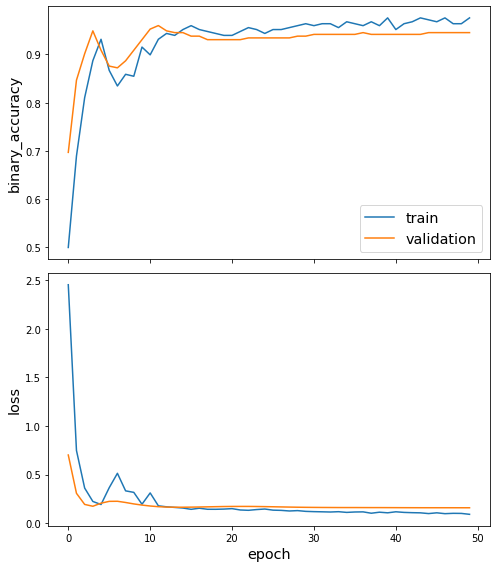

In [ ]:
sg.utils.plot_history(history)

In [ ]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 46ms/step - loss: 0.1598 - binary_accuracy: 0.9453

Train Set Metrics of the trained model:
	loss: 0.0860
	binary_accuracy: 0.9758

Test Set Metrics of the trained model:
	loss: 0.1598
	binary_accuracy: 0.9453
